In [0]:
!wget https://github.com/CSSEGISandData/COVID-19/archive/master.zip
!unzip master.zip

In [0]:
!pip install geopandas

In [0]:
import pandas as pd
import numpy as np
import os
from skimage import io

import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
root_path = 'COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/'

recent = sorted(os.listdir(root_path))[-2]
path = os.path.join(root_path, recent)
df = pd.read_csv(path)
print(df.shape)
display(df)
country = df['Country/Region'].to_numpy()
print(np.unique(country))

(292, 8)


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-19T10:13:14,67800,3130,57682,30.9756,112.2707
1,NaN,Italy,2020-03-19T17:43:03,41035,3405,4440,41.8719,12.5674
2,NaN,Iran,2020-03-19T11:33:29,18407,1284,5710,32.4279,53.6880
3,NaN,Spain,2020-03-19T20:13:08,17963,830,1107,40.4637,-3.7492
4,NaN,Germany,2020-03-19T20:13:08,15320,44,113,51.1657,10.4515
...,...,...,...,...,...,...,...,...
287,NaN,Jersey,2020-03-17T18:33:03,0,0,0,49.1900,-2.1100
288,NaN,Puerto Rico,2020-03-17T16:13:14,0,0,0,18.2000,-66.5000
289,NaN,Republic of the Congo,2020-03-17T21:33:03,0,0,0,-1.4400,15.5560
290,NaN,The Bahamas,2020-03-19T12:13:38,0,0,0,24.2500,-76.0000


['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cruise Ship' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana'
 'Gabon' 'Gambia, The' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland'
 'Guadeloupe' 'Guam' 'Guatemala' 'Guernsey' 'Guinea' 'Guyana' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jersey' 'Jordan'
 'Kazakhstan' 'Kenya' 'Korea, South' 'K

In [0]:
dic_coor = {}
for index, row in df.iterrows():
  dic_coor[row['Country/Region']] = [row['Longitude'], row['Latitude']]

In [0]:
# Carregar mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
for tipo in ['abs', 'log']:
  print("Gerando dados tipo", tipo, "\n")

  if not os.path.isdir(tipo):
    os.mkdir(tipo)

  for k, csv in enumerate(sorted(os.listdir(root_path))):
    plt.close('all')
    print(csv[:-4], end=',')
    
    if not csv[-3:] == 'csv': continue
    
    path = os.path.join(root_path, csv)
    df = pd.read_csv(path)
    
    # Converter latitude e longitude para GeoDataFrame
    if 'Longitude' not in df.columns.to_numpy():

      regions = df['Country/Region']
      regions = [r if r in dic_coor else 'China' for r in regions]
      longitude = [dic_coor[r][0] for r in regions]
      latitude  = [dic_coor[r][1] for r in regions]

      df['Longitude'] = longitude
      df['Latitude']  = latitude  
      
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'],df['Latitude']))

    ax = world.plot(figsize=(15, 8))
    
    if tipo == "log":
      gdf.plot(ax=ax, color='darkred', markersize=np.log10(gdf['Confirmed'])*2e1, alpha=0.6, ec='red')
      plt.title('Número de casos do COVID-19\nLog dos Valores', fontsize=21)
    else:
      gdf.plot(ax=ax, color='darkred', markersize=gdf['Confirmed'], alpha=0.6, ec='red')
      plt.title('Número de casos do COVID-19\nValores Absolutos', fontsize=21)
      
    date = csv[:-4].split('-')
    plt.xlabel(date[1]+'/'+date[0]+'/'+date[2], fontsize=21)
    plt.xticks([],[])
    plt.yticks([],[])

    plt.text(-193,0,'@canalpeixebabel', fontsize=12, va='center', color='darkblue', rotation=90)
    plt.savefig(tipo+'/{:02d}.png'.format(k), dpi=150, format='png')

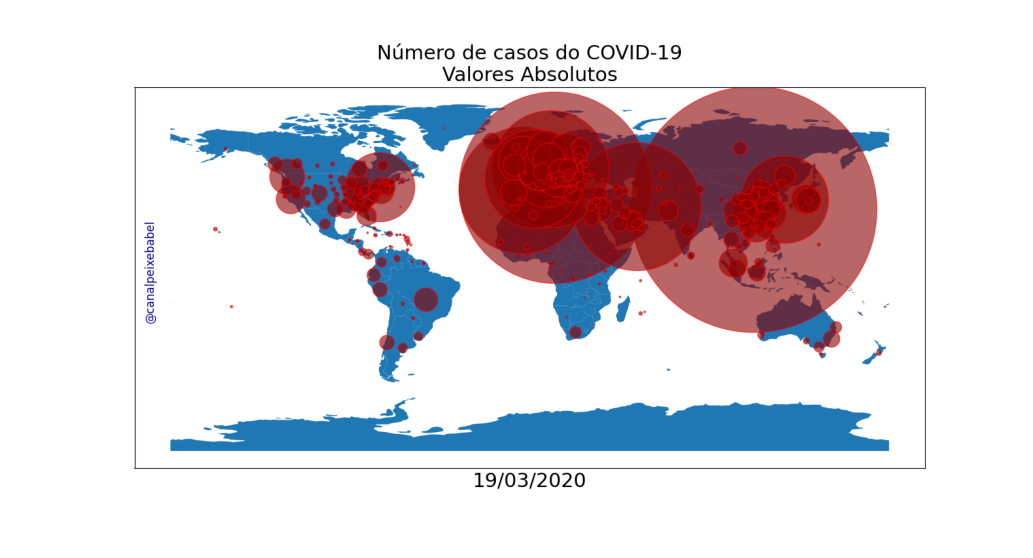

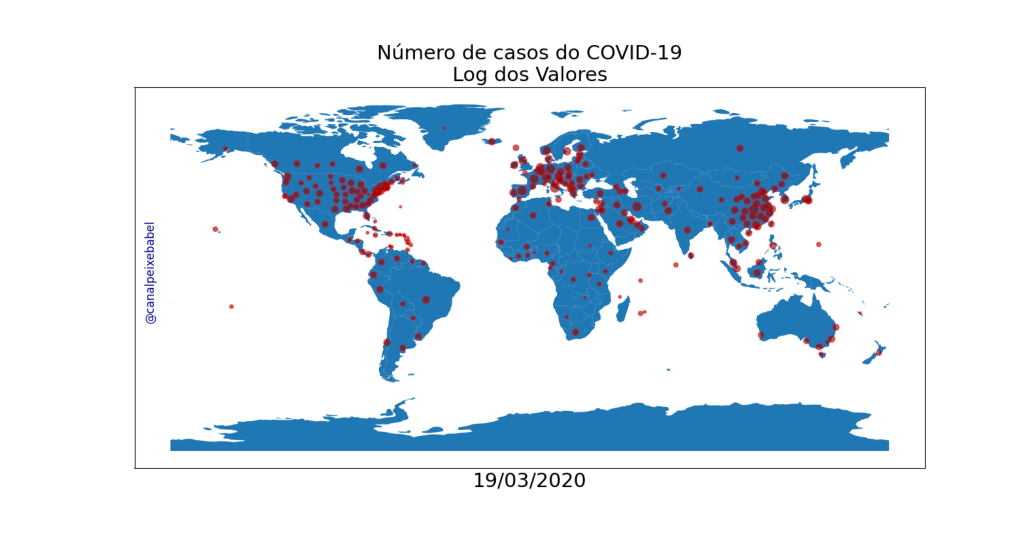

In [20]:
for tipo in ['abs', 'log']:
  plt.figure(figsize=(20, 10))
  img = io.imread('{:s}/{:02d}.png'.format(tipo, len(os.listdir(root_path))))
  plt.imshow(img)
  plt.axis('off')
  plt.show()


In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Capa Log
ax = world.plot(figsize=(15, 8), alpha=0.5)
plt.text(0, 0, 'Número de casos do COVID-19\nLog dos Valores', linespacing=2 ,ha='center', 
        bbox=dict(boxstyle="round",
                  ec=(1., 0.5, 0.5),
                  facecolor=(0.7, 0.1, 0.1, 0.8),
                  ),color='white', fontsize=30)
plt.text(-193,0,'@canalpeixebabel', fontsize=12, va='center', color='darkblue', rotation=90)
plt.savefig('logtitle.png', dpi=100,format='png')
plt.close('all')

# Capa Abs
ax = world.plot(figsize=(15, 8), alpha=0.5)
plt.text(0, 0, 'Número de casos do COVID-19\nValores Absolutos', linespacing=2 ,ha='center', 
        bbox=dict(boxstyle="round",
                  ec=(1., 0.5, 0.5),
                  facecolor=(0.7, 0.1, 0.1, 0.8),
                  ),color='white', fontsize=30)
plt.text(-193,0,'@canalpeixebabel', fontsize=12, va='center', color='darkblue', rotation=90)
plt.savefig('abstitle.png', dpi=100,format='png')
plt.close('all')

In [0]:
os.environ['num_csv'] = str(len(os.listdir(root_path))-2)
!cp abs/$num_csv.png abs/`expr $num_csv + 1`.png
!cp abs/$num_csv.png abs/`expr $num_csv + 2`.png
!cp abs/$num_csv.png abs/`expr $num_csv + 3`.png

!cp log/$num_csv.png log/`expr $num_csv + 1`.png 
!cp log/$num_csv.png log/`expr $num_csv + 2`.png
!cp log/$num_csv.png log/`expr $num_csv + 3`.png

In [14]:
import imageio
images = []
filenames = ['abstitle.png', 'abstitle.png', 'abstitle.png', 'abstitle.png', 'abstitle.png', 'abstitle.png', 'abstitle.png', 'abstitle.png']
filenames.extend(['abs/'+ f for f in sorted(os.listdir('abs/'))] )
filenames.extend( ['logtitle.png', 'logtitle.png', 'logtitle.png', 'logtitle.png', 'logtitle.png', 'logtitle.png', 'logtitle.png'] )
filenames.extend(['log/'+ f for f in sorted(os.listdir('log/'))] )
print(filenames)
for filename in filenames:
    if '.png' in filename:
      images.append(imageio.imread(filename))
imageio.mimsave('data-covid19.gif', images, duration=1/3)
print("data-covid19.gif salvo nos seus arquivos")

['abstitle.png', 'abstitle.png', 'abstitle.png', 'abstitle.png', 'abstitle.png', 'abstitle.png', 'abstitle.png', 'abstitle.png', 'abs/01.png', 'abs/02.png', 'abs/03.png', 'abs/04.png', 'abs/05.png', 'abs/06.png', 'abs/07.png', 'abs/08.png', 'abs/09.png', 'abs/10.png', 'abs/11.png', 'abs/12.png', 'abs/13.png', 'abs/14.png', 'abs/15.png', 'abs/16.png', 'abs/17.png', 'abs/18.png', 'abs/19.png', 'abs/20.png', 'abs/21.png', 'abs/22.png', 'abs/23.png', 'abs/24.png', 'abs/25.png', 'abs/26.png', 'abs/27.png', 'abs/28.png', 'abs/29.png', 'abs/30.png', 'abs/31.png', 'abs/32.png', 'abs/33.png', 'abs/34.png', 'abs/35.png', 'abs/36.png', 'abs/37.png', 'abs/38.png', 'abs/39.png', 'abs/40.png', 'abs/41.png', 'abs/42.png', 'abs/43.png', 'abs/44.png', 'abs/45.png', 'abs/46.png', 'abs/47.png', 'abs/48.png', 'abs/49.png', 'abs/50.png', 'abs/51.png', 'abs/52.png', 'abs/53.png', 'abs/54.png', 'abs/55.png', 'abs/56.png', 'abs/57.png', 'abs/58.png', 'abs/59.png', 'abs/60.png', 'abs/61.png', 'logtitle.png', '